In [1]:
import sklearn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

In [2]:
def accuracy_score(y_pred, y_true):
    actual_labels = len(y_true)
    correct_labels = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
    accuracy = correct_labels / actual_labels
    return accuracy * 100

In [3]:
image_path = "C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\"

In [4]:
images_array = []
for image in range(4):
    images_array.append(glob.glob(image_path + str(image) + '/*.jpg'))

print(images_array)

[['C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\0.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\1.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\2.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\3.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\4.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\5.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\6.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\7.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\8.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\0\\9.jpg'], ['C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\0.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\1.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\2.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\3.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\4.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\5.jpg', 'C:\\Users\\andre\\Desktop\\Proiect_CV\\hand\\1\\6.jpg', 'C:\\Users\\andre\\Desktop\

In [5]:
random.seed(42)
image_index_array = random.sample(range(0,10), 7)
print(image_index_array)

[1, 0, 4, 9, 6, 5, 8]


In [6]:
train_image_paths = []
test_image_paths = []

for path in images_array:
    temp_train = []
    temp_test = []
    for index in range(10):
        if index in image_index_array:
            temp_train.append(path[index])
        else:
            temp_test.append(path[index])
    train_image_paths.append(temp_train)
    test_image_paths.append(temp_test)

print(np.shape(train_image_paths))

(4, 7)


In [7]:
train_images = []
test_images = []

for index in range(7):
    temp = []
    for path in train_image_paths:
        temp.append(cv2.imread(path[index]))
    train_images.append(temp)

for index in range(3):
    temp = []
    for path in test_image_paths:
        temp.append(cv2.imread(path[index]))
    test_images.append(temp)

(7, 4, 2048, 1536, 3)


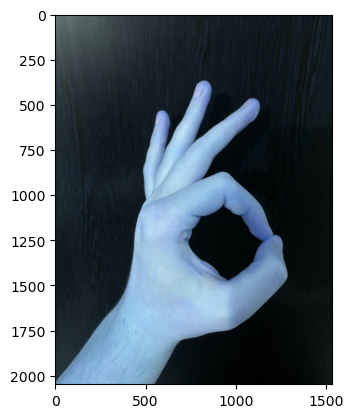

In [8]:
print(np.shape(train_images))
plt.figure()
plt.imshow(train_images[0][1]) # BGR channels

In [9]:
print(np.shape(train_images[0][0]))

(2048, 1536, 3)


In [10]:
#resize and change color BGR -> RGB
for index_image, images in enumerate(train_images):
    for index_class, classes in enumerate(images): 
        im_rgb = cv2.cvtColor(classes,cv2.COLOR_BGR2RGB)
        train_images[index_image][index_class] = cv2.resize(im_rgb,(480,640))

for index_image, images in enumerate(test_images):
    for index_class, classes in enumerate(images):
        im_rgb = cv2.cvtColor(classes,cv2.COLOR_BGR2RGB)
        test_images[index_image][index_class] = cv2.resize(im_rgb,(480,640))
print(np.shape(train_images))

(7, 4, 640, 480, 3)


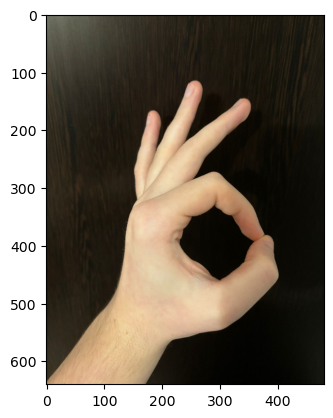

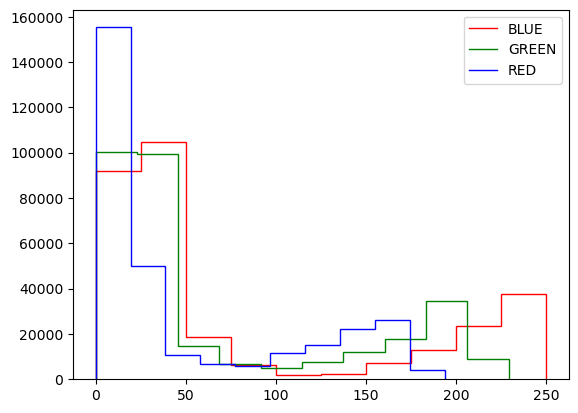

In [11]:
# Histogram
colours = ('r', 'g', 'b')
plt.figure()
plt.imshow(train_images[0][1])
plt.show()
for color in range(3): 
    hist, bin_edges = np.histogram(train_images[0][1][:,:,color])
    plt.stairs(hist, bin_edges, color = colours[color])
plt.legend(['BLUE', 'GREEN', 'RED'])

In [12]:
def separate_hand_from_background(image):
    image_without_blue = np.array(image[:,:,0])
    image_without_blue[image_without_blue < 125] = 0
    return image_without_blue

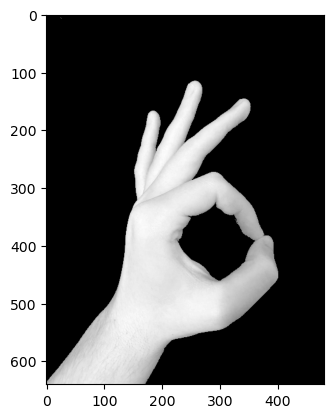

In [13]:
plt.figure()
plt.imshow(separate_hand_from_background(train_images[0][1]),cmap='gray')
plt.show()

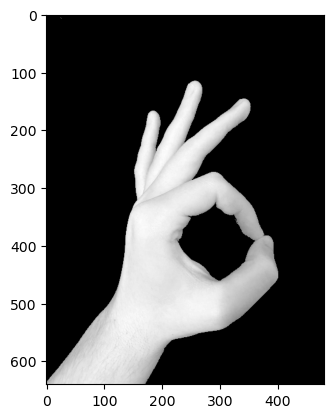

In [14]:
#Eliminate background from all images:
hand_train_images = []
hand_test_images = []

for index_image, images in enumerate(train_images):
    temp = []
    for index_class, classes in enumerate(images):
        temp.append(separate_hand_from_background(train_images[index_image][index_class]))
    hand_train_images.append(temp)
    
for index_image, images in enumerate(test_images):
    temp = []
    for index_class, classes in enumerate(images):
        temp.append(separate_hand_from_background(test_images[index_image][index_class]))
    hand_test_images.append(temp)
        
plt.imshow(hand_train_images[0][1], cmap='gray')

Other methods for edge detection. Canny and Sobel:

Text(0.5, 1.0, 'Binary mask')

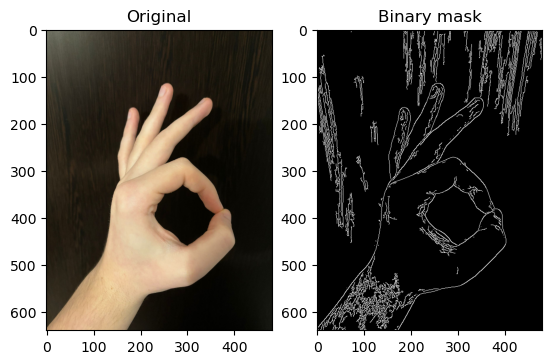

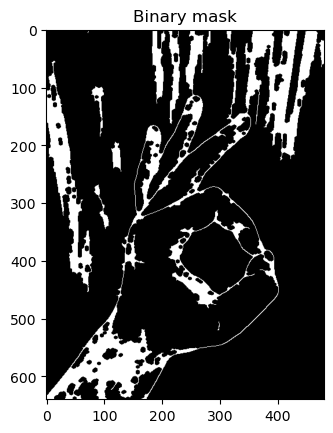

In [15]:
#Canny
img = train_images[0][1]
edges = cv2.Canny(img, 10, 80)
plt.figure(1)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(122)
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")
nucleu = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, nucleu) #closing = Dilation followed by Erosion
plt.figure()
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")

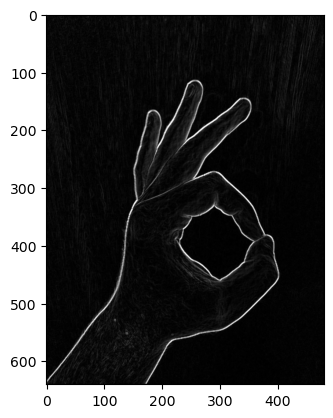

In [16]:
# Sobel filter
gray = train_images[0][1][:,:,1]
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# convertirea in valori strict pozitive
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# se compun cele doua filtrari in proportii egale

plt.imshow(grad, cmap='gray')
plt.show()

C1 = (R > 95) & (G > 40) & (B > 20) - values of caucasian skin

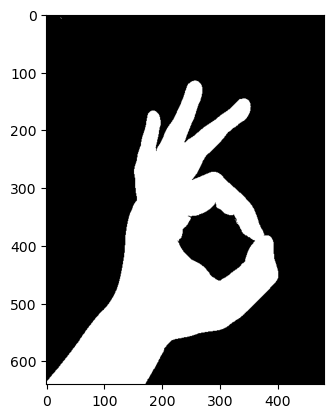

In [17]:
# Binarization of all images
for index_image, images in enumerate(train_images): 
    for index_class, classes in enumerate(images):
        hand_train_images[index_image][index_class][(hand_train_images[index_image][index_class])>0] = 255


for index_image, images in enumerate(test_images): 
    for index_class, classes in enumerate(images): 
        hand_test_images[index_image][index_class][(hand_test_images[index_image][index_class])>0] = 255

plt.imshow(hand_train_images[0][1],cmap='gray')
plt.show()

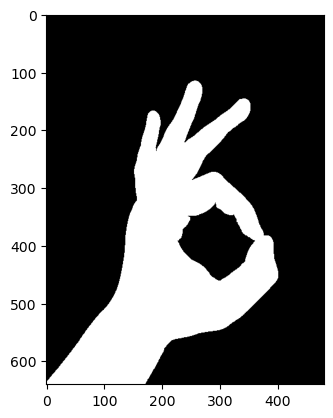

(7, 4, 640, 480, 3)


In [18]:
# filtrarea morfologica a imaginii - filtru de deschidere = eroziune + dilatare
kernel = np.ones((3,3),np.uint8)

for index_image, images in enumerate(train_images): 
    for index_class, classes in enumerate(images): 
        hand_train_images[index_image][index_class] = cv2.morphologyEx(hand_train_images[index_image][index_class],
                                        cv2.MORPH_OPEN, kernel, iterations = 2)


for index_image, images in enumerate(test_images):
    for index_class, classes in enumerate(images): 
        hand_test_images[index_image][index_class] = cv2.morphologyEx(hand_test_images[index_image][index_class],
                                        cv2.MORPH_OPEN, kernel, iterations = 2)


plt.imshow(hand_train_images[0][1], cmap='gray')
plt.show()
print(np.shape(train_images))

In [19]:
# decuparea mainii din imagine, img bin si cea originala
def hand_contour(img, img_orig):
    contour,_ = cv2.findContours(img.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    arie_max=0
    rect_max = np.array([0,0,0,0])
    for i in contour:
        temp = cv2.boundingRect(i) #dreptunghiul se calculeaza (x,y,width,height)
        if temp[2]*temp[3] > arie_max:
            arie_max = temp[2]*temp[3]
            rect_max = temp
    return crop_img(img,rect_max), crop_img(img_orig,rect_max)

def crop_img(img, rect):
    return img[rect[1]:(rect[1]+rect[3]),rect[0]:(rect[0]+rect[2])]

In [20]:
for index_image, images in enumerate(train_images): 
    for index_class, classes in enumerate(images): 
        hand_train_images[index_image][index_class],train_images[index_image][index_class] = hand_contour(hand_train_images[index_image][index_class],
                                                                   train_images[index_image][index_class])

for index_image, images in enumerate(test_images): 
    for index_class, classes in enumerate(images): 
        hand_test_images[index_image][index_class],test_images[index_image][index_class] = hand_contour(hand_test_images[index_image][index_class],
                                                                   test_images[index_image][index_class])

<Figure size 640x480 with 0 Axes>

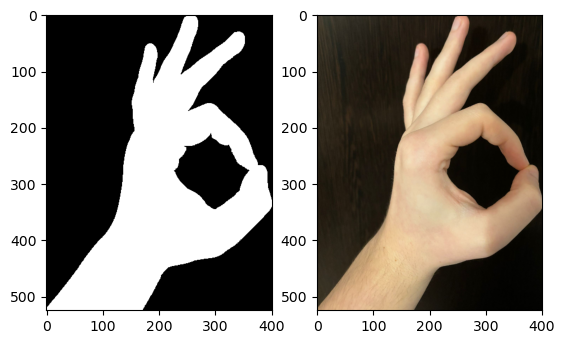

In [21]:
img_bin, img_orig = hand_contour(hand_train_images[0][1], train_images[0][1])
plt.figure()
fig, axes = plt.subplots(1,2)
axes[0].imshow(img_bin, cmap = 'gray')
axes[1].imshow(img_orig)
plt.show()

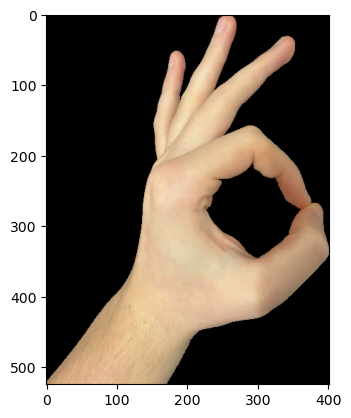

In [22]:
#Extract hand from all images
for index_images, images in enumerate(train_images): 
    for index_class, classes in enumerate(images): 
        train_images[index_images][index_class][hand_train_images[index_images][index_class] == 0] = 0

for index_images, images in enumerate(test_images): 
    for index_class, classes in enumerate(images): 
        test_images[index_images][index_class][hand_test_images[index_images][index_class] == 0] = 0

plt.imshow(train_images[0][1])

In [23]:
# HoG OpenCV
# Resize images to be the same width and height
height = 128
width = 64

winSize = (32,64) #detection window size. HOG calculates features inside of this window size
blockSize = (16,16) #winSize in blocks, this represents the dimension of each one
blockStride = (8,8) # how much winSize moves each step
cellSize = (8,8) #dimension of cell size where hog features are calculated
nbins = 9 
derivAperture = 1 
winSigma = 4. #standard deviation for Gaussian function
histogramNormType = 0 # type of normalization
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
rndp = 32
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [24]:
descriptors_train = []
labels_train = []

for index_image, images in enumerate(train_images):
    for index_class, classes in enumerate(images): 
        train_images[index_image][index_class] = cv2.resize(train_images[index_image][index_class], (width, height))
        descriptor = hog.compute(train_images[index_image][index_class])
        descriptors_train.append(descriptor)
        labels_train.append(index_class)


print(np.shape(descriptors_train[0]))

descriptors_test = []
labels_test = []

for index_image, images in enumerate(test_images): 
    for index_class, classes in enumerate(images): 
        test_images[index_image][index_class] = cv2.resize(test_images[index_image][index_class], (width, height))
        descriptor = hog.compute(test_images[index_image][index_class])
        descriptors_test.append(descriptor)
        labels_test.append(index_class)

print(np.shape(descriptors_test[0]))

(34020,)
(34020,)


In [25]:
descriptors_train = np.float32(descriptors_train)
labels_train = np.float32(labels_train)
descriptors_test = np.float32(descriptors_test)
labels_test = np.float32(labels_test)

print(np.shape(descriptors_test))

(12, 34020)


In [26]:
knn = cv2.ml.KNearest.create()
knn.train(descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)
predictions_KNN = []
for newcomer in descriptors_test:
    newcomer = np.reshape(newcomer,(1,34020))
    result,_,_,_ = knn.findNearest(newcomer, 3)
    predictions_KNN.append(result)
print(predictions_KNN)
print(labels_test)
accuracy_score(predictions_KNN,labels_test)

[0.0, 1.0, 2.0, 3.0, 0.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0]
[0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.]


83.33333333333334

In [27]:
labels_train = np.int32(labels_train)
labels_test = np.int32(labels_test)

In [28]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC) 
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

predictions_SVM = []
for newcomer in descriptors_test:
    newcomer = np.reshape(newcomer,(1,34020))
    result = svm.predict(newcomer)[1]
    predictions_SVM.append(result)
print(predictions_SVM)
print(labels_test)
accuracy_score(predictions_SVM,labels_test)

[array([[2.]], dtype=float32), array([[1.]], dtype=float32), array([[2.]], dtype=float32), array([[3.]], dtype=float32), array([[0.]], dtype=float32), array([[1.]], dtype=float32), array([[2.]], dtype=float32), array([[3.]], dtype=float32), array([[0.]], dtype=float32), array([[1.]], dtype=float32), array([[3.]], dtype=float32), array([[3.]], dtype=float32)]
[0 1 2 3 0 1 2 3 0 1 2 3]


83.33333333333334